In [45]:
import sklearn


In [46]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer,TfidfTransformer
import pandas as pd
import matplotlib.pyplot as plt


In [47]:
samples= pd.read_csv('dataset/2.DatasetLabeling_NomorUrut_clean_content_textblobvader.csv', encoding='UTF-8')
# samples=samples[['likes','replies','quotes','retweets','searchQuery','clean_content']]
samples.shape

(7306, 20)

In [48]:
print("Jumlah Konten unik:",int(len(samples['clean_content'].unique())))
# samples['clean_content'].unique()

Jumlah Konten unik: 3307


In [49]:
samples.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7306 entries, 0 to 7305
Data columns (total 20 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   text                           7306 non-null   object 
 1   clean_content                  7306 non-null   object 
 2   likes                          7306 non-null   int64  
 3   replies                        7306 non-null   int64  
 4   quotes                         7306 non-null   int64  
 5   retweets                       7306 non-null   int64  
 6   searchQuery                    7306 non-null   object 
 7   user_location                  3472 non-null   object 
 8   tanggal                        7306 non-null   object 
 9   dataset                        7306 non-null   object 
 10  date                           7306 non-null   object 
 11  textblob_sentiment             7306 non-null   object 
 12  textblob_sentiment_assessment  7306 non-null   o

In [50]:
samples.drop_duplicates(subset=['clean_content'], inplace=True,keep='last')
# print(samples)

In [51]:
len(samples)

3307

In [52]:
print("Jumlah Konten unik:",int(len(samples['clean_content'].unique())))
# samples.shape

Jumlah Konten unik: 3307


In [53]:
# len(samples['clean_content'].unique())
print("Jumlah Query unik:",int(len(samples['searchQuery'].unique())))
samples['searchQuery'].unique()

Jumlah Query unik: 28


array(['#KIM', '#gibran', '#prabowo', '#indonesiamaju',
       '#koalisiindonesiamaju', '#prabowo2024', '#prabowogibran',
       'paslon', 'nomor urut', '#aniesmuhaimin', '#aniespresiden',
       '#aniesbaswedan', '#anies2024', '#muhaimin', '#AMIN',
       '#aniescakimin', '#anies', '#koalisiperubahan', '#cakimin',
       '#ganjarpresiden', '#ganjar', '#nomor', '#ganjarpranowo', '#GAMA',
       '#ganjar2024', '#mahfud', '#ganjarmahfud', '#mahfudmd'],
      dtype=object)

## Define Date Timestamp

In [54]:
from datetime import datetime
import pytz


now = datetime.now() # current date and time

tz = pytz.timezone('Asia/Jakarta')
aware_obj = tz.localize(now)
d = aware_obj.strftime("%d%m%Y")
print(d,now,aware_obj.tzinfo)

24112023 2023-11-24 04:01:45.988371 Asia/Jakarta


## Setup Data Sampling

In [55]:
totaldata=str(len(samples))

In [56]:
print(samples['dataset'].value_counts().reindex(['prabowogibran','aniesmuhaimin','ganjarmahfud'], fill_value=0))

dataset
prabowogibran     248
aniesmuhaimin     987
ganjarmahfud     2072
Name: count, dtype: int64


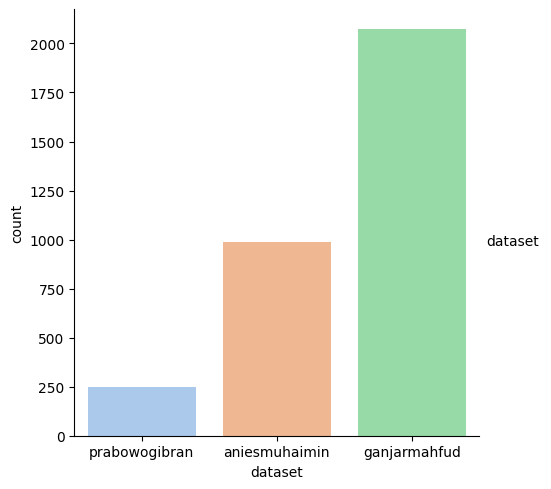

In [57]:
import seaborn as sns
sns.catplot(data=samples, x="dataset", kind="count",hue="dataset",palette="pastel")
plt.savefig('hasil/5.statistik_dataset_'+totaldata+'.png')

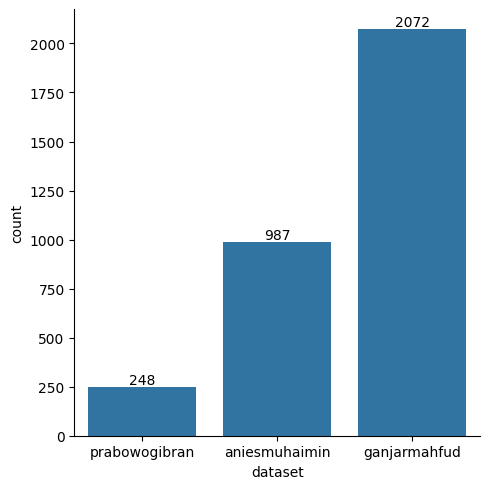

In [58]:
grid = sns.catplot(x='dataset', kind='count', data=samples)
ax = grid.axes[0, 0]
ax.bar_label(ax.containers[0])
plt.savefig('hasil/5.statistik_dataset2_'+totaldata+'.png')

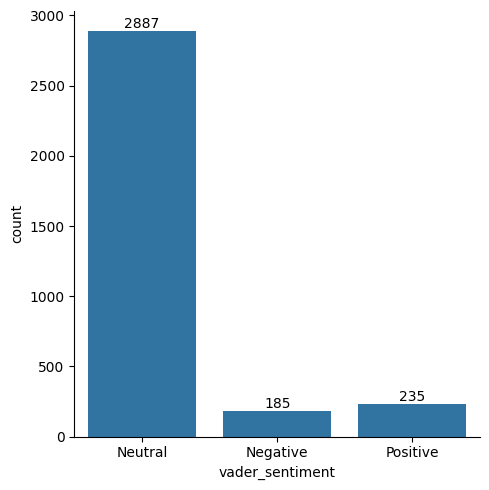

In [59]:
grid = sns.catplot(x='vader_sentiment', kind='count', data=samples)
ax = grid.axes[0, 0]
ax.bar_label(ax.containers[0])
plt.savefig('hasil/5.statistik_dataset_sentiment_'+totaldata+'.png')

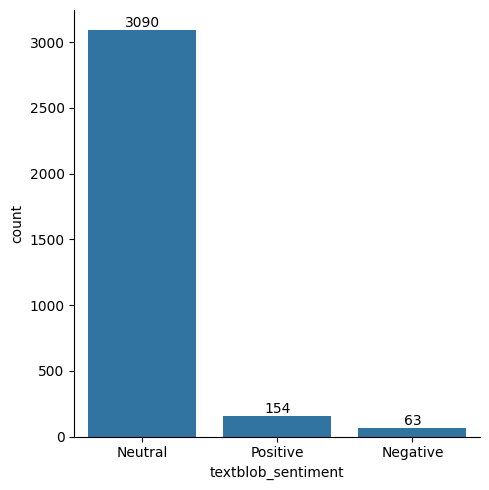

In [60]:
grid = sns.catplot(x='textblob_sentiment', kind='count', data=samples)
ax = grid.axes[0, 0]
ax.bar_label(ax.containers[0])
plt.savefig('hasil/5.statistik_dataset_sentiment_'+totaldata+'.png')

In [61]:
# dataset1=samples.query("dataset=='prabowogibran' and vader_sentiment=='Negative'").sample(10)
dataset1=samples.query("dataset=='prabowogibran'")#.sample(10)
dataset2=samples.query("dataset=='aniesmuhaimin'")#.sample(10)
dataset3=samples.query("dataset=='ganjarmahfud'")#.sample(10)

In [62]:
dataset1.head()

,text,clean_content,likes,replies,quotes,retweets,searchQuery,user_location,tanggal,dataset,date,textblob_sentiment,textblob_sentiment_assessment,textblob_polarity,textblob_subject,vader_compound,vader_neg,vader_neu,vader_pos,vader_sentiment
2,Pak Prabowo mengangkat anak penerbang tucano y...,prabowo angkat anak terbang tucano gugur anak ...,0,0,0,0,#KIM,NaN,11/20/2023,prabowogibran,2023-11-20,Neutral,"Sentiment(polarity=0.0, subjectivity=0.0, asse...",0.0,0.0,0.0,0.0,1.0,0.0,Neutral
3,"Unboxing Prabowo; Cerita sejarah, deklarasi bu...",unboxing prabowo cerita sejarah deklarasi budi...,1,0,0,0,#KIM,NaN,11/20/2023,prabowogibran,2023-11-20,Neutral,"Sentiment(polarity=0.0, subjectivity=0.0, asse...",0.0,0.0,0.0,0.0,1.0,0.0,Neutral
7,"Pakar Intelijen AM Hendropriyono, Jika Tidak A...",pakar intelijen am hendropriyono halang rintan...,0,0,0,0,#KIM,NaN,11/20/2023,prabowogibran,2023-11-20,Neutral,"Sentiment(polarity=0.0, subjectivity=0.0, asse...",0.0,0.0,0.0,0.0,1.0,0.0,Neutral
8,Yang Orang tidak tahu tentang Pak Prabowo \n #...,orang prabowo indonesiaterusmaju energibaru se...,0,0,0,0,#KIM,NaN,11/20/2023,prabowogibran,2023-11-20,Neutral,"Sentiment(polarity=0.0, subjectivity=0.0, asse...",0.0,0.0,0.0,0.0,1.0,0.0,Neutral
9,Pak Prabowo Subianto kembali meresmikan 15 tit...,prabowo subianto resmi titik sumber air bersih...,0,0,0,0,#KIM,NaN,11/20/2023,prabowogibran,2023-11-20,Neutral,"Sentiment(polarity=0.0, subjectivity=0.0, asse...",0.0,0.0,0.0,0.0,1.0,0.0,Neutral


In [63]:
dataset1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 248 entries, 2 to 1815
Data columns (total 20 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   text                           248 non-null    object 
 1   clean_content                  248 non-null    object 
 2   likes                          248 non-null    int64  
 3   replies                        248 non-null    int64  
 4   quotes                         248 non-null    int64  
 5   retweets                       248 non-null    int64  
 6   searchQuery                    248 non-null    object 
 7   user_location                  138 non-null    object 
 8   tanggal                        248 non-null    object 
 9   dataset                        248 non-null    object 
 10  date                           248 non-null    object 
 11  textblob_sentiment             248 non-null    object 
 12  textblob_sentiment_assessment  248 non-null    object 

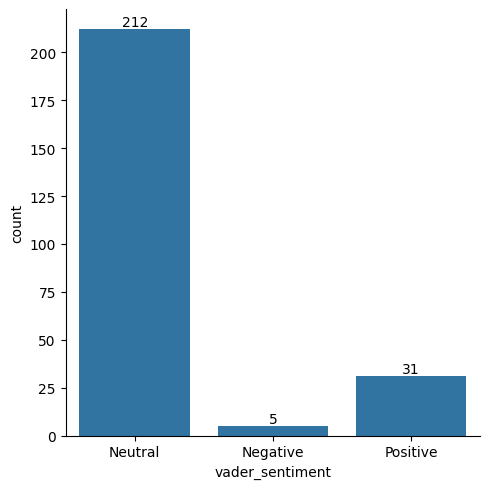

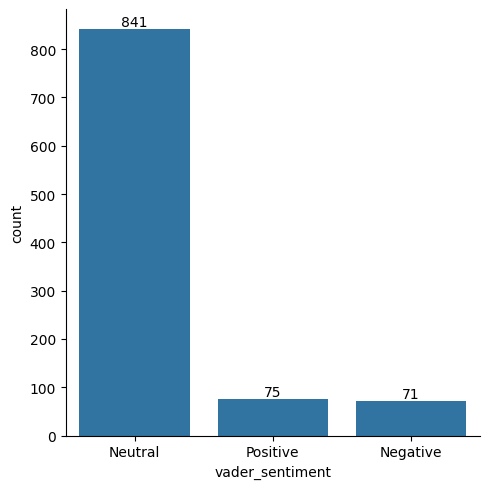

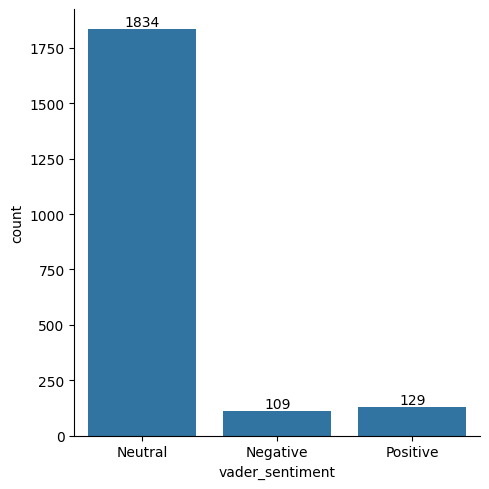

In [64]:
# grid = sns.catplot(x='vader_sentiment', kind='count', data=dataset1)
prabowo1=sns.catplot(data=dataset1, x="vader_sentiment", kind="count")#,hue="vader_sentiment",palette="pastel")
ax = prabowo1.axes[0, 0]
ax.bar_label(ax.containers[0])
plt.savefig('hasil/5.statistik_dataset_'+totaldata+'_prabowo_'+str(len(dataset1))+'.png')

anies1=sns.catplot(data=dataset2, x="vader_sentiment", kind="count")#,hue="vader_sentiment",palette="pastel")
ax1 = anies1.axes[0, 0]
ax1.bar_label(ax1.containers[0])
plt.savefig('hasil/5.statistik_dataset_'+totaldata+'_anies_'+str(len(dataset2))+'.png')

ganjar1=sns.catplot(data=dataset3, x="vader_sentiment", kind="count")#,hue="vader_sentiment",palette="pastel")
ax2 = ganjar1.axes[0, 0]
ax2.bar_label(ax2.containers[0])
plt.savefig('hasil/5.statistik_dataset_'+totaldata+'_ganjar_'+str(len(dataset3))+'.png')

## Balanced Sampling

In [65]:
#get sampling data random
# jsampling=25  
# sample=samples.sample(n=jsampling,replace=True,random_state=42)
#get sampling random 50% of data random 
# df = df.sample(n=3,replace=True,frac=0.5,random_state=42)

In [66]:
# column = 'vader_sentiment'
jsampling=1500
# datax1=samples[['dataset','vader_sentiment','clean_content']]
# balanceddf = samples.groupby(column).sample(n=samples[column].value_counts().min(), random_state=42)
# balanceddf = samples.groupby(['dataset','vader_sentiment']).sample(n=jsampling,replace=True, random_state=42)
balanceddf = samples.groupby(['dataset']).sample(n=jsampling,replace=True, random_state=42)

In [67]:
# balanceddf.head(10)

In [68]:
# balanced_df=samples.groupby('vader_sentiment',as_index = False,group_keys=False).apply(lambda s: s.sample(3,replace=True))

In [69]:
# balanceddf.head(10)

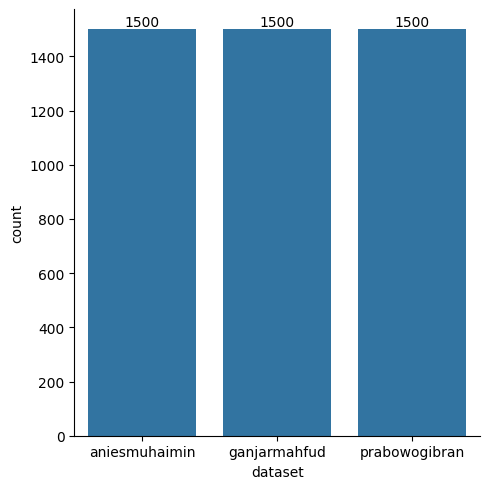

In [70]:
balanced=sns.catplot(data=balanceddf, x="dataset", kind="count")#,hue="vader_sentiment",palette="pastel")
axx = balanced.axes[0, 0]
axx.bar_label(axx.containers[0])
plt.savefig('hasil/5.statistik_dataset_sampling_'+str(jsampling)+'_balanced.png')

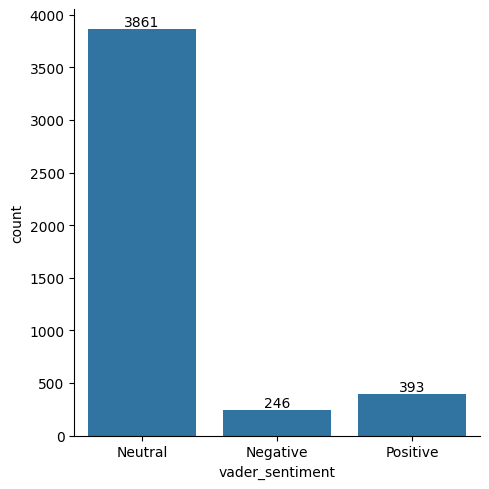

In [71]:
balanced1=sns.catplot(data=balanceddf, x="vader_sentiment", kind="count")#,hue="vader_sentiment",palette="pastel")
axx = balanced1.axes[0, 0]
axx.bar_label(axx.containers[0])
plt.savefig('hasil/5.statistik_dataset_sampling_'+str(jsampling)+'_sentiment_imbalanced.png')

In [72]:
print(balanceddf['dataset'].value_counts().reindex(['prabowogibran','aniesmuhaimin','ganjarmahfud'], fill_value=0))
print(balanceddf['vader_sentiment'].value_counts().reindex(['Positive','Neutral','Negative'], fill_value=0))

dataset
prabowogibran    1500
aniesmuhaimin    1500
ganjarmahfud     1500
Name: count, dtype: int64
vader_sentiment
Positive     393
Neutral     3861
Negative     246
Name: count, dtype: int64


In [73]:
import numpy as np
# Code Snippet for Character Length Histogram
def plot_character_length_histogram(text):
    text.str.len().\
        hist()

# Code Snippet for Word Number Histogram
def plot_word_number_histogram(text):
    text.str.split().\
        map(lambda x: len(x)).\
        hist()

# Code Snippet for Word Length Histogram
def plot_word_length_histogram(text):
    text.str.split().\
        apply(lambda x: [len(i) for i in x]). \
        map(lambda x: np.mean(x)).\
        hist()

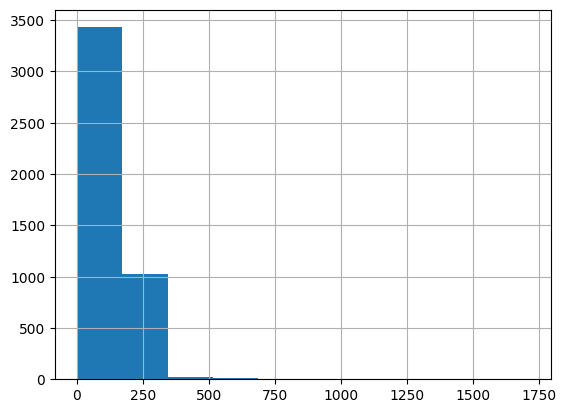

In [74]:
# plot_character_length_histogram(sample['clean_content'])
plot_character_length_histogram(balanceddf['clean_content'])
plt.savefig('hasil/5.statistik_dataset_'+str(jsampling)+'_balanced_character_length_histogram.png')

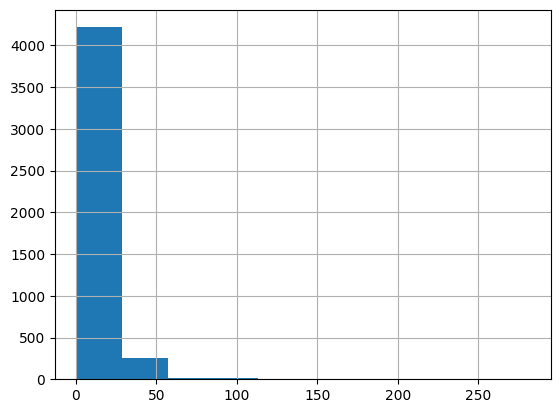

In [75]:
# plot_word_number_histogram(sample['clean_content'])
plot_word_number_histogram(balanceddf['clean_content'])
plt.savefig('hasil/5.statistik_dataset_'+str(jsampling)+'_balanced_word_number_histogram.png')

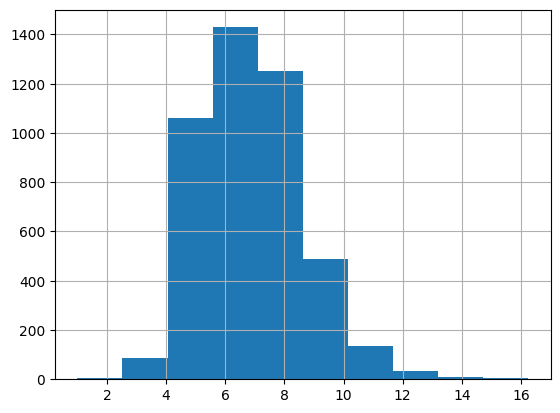

In [76]:
# plot_word_length_histogram(sample['clean_content'])
plot_word_length_histogram(balanceddf['clean_content'])
plt.savefig('hasil/5.statistik_dataset_'+str(jsampling)+'_balanced_word_length_histogram.png')

## Split Dataset

In [77]:
# sample.head()

In [78]:
# dataset=sample
dataset=balanceddf
X = dataset['clean_content']     # Define feature matriX
y = dataset['vader_sentiment']         # Define target feature matriX
target_label=['Positive','Neutral','Negative']
jumlahdatauji=0.25
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=jumlahdatauji, random_state=42, stratify=y)

datalatih=('Dataset shopee {}:{} \n [INFO] Sebaran kelas pada training  set: \n Negative: \t {} \n Neutral: \t{} \n Positive:\t{} \n'.format((1-jumlahdatauji)*100,jumlahdatauji*100,sum(y_train=='Negative'), sum(y_train=='Neutral'), sum(y_train=='Positive')))
datauji=('[INFO] Sebaran kelas pada testing set:\n Negative: \t{}\n Neutral: \t{}\n Positive:\t{} \n'.format(sum(y_test=='Negative'), sum(y_test=='Neutral'), sum(y_test=='Positive')))

dimensi_data=('[INFO] Shape Data: \n X_train: \t {} \n X_test: \t {} \n y_train: \t {} \n y_test: \t {} \n'.format(X_train.shape, X_test.shape, y_train.shape, y_test.shape))

with open('hasil/datauji-pilpres2024_sample_'+str(jsampling)+'.txt', 'a', encoding='utf-8') as f:
    f.writelines(''.join(datalatih))
    f.writelines(''.join(datauji))
    f.writelines(''.join(dimensi_data))

print(datalatih, datauji, dimensi_data)
dtuji=int(jumlahdatauji*100)
dtlatih=(100-(dtuji))

Dataset shopee 75.0:25.0 
 [INFO] Sebaran kelas pada training  set: 
 Negative: 	 184 
 Neutral: 	2896 
 Positive:	295 
 [INFO] Sebaran kelas pada testing set:
 Negative: 	62
 Neutral: 	965
 Positive:	98 
 [INFO] Shape Data: 
 X_train: 	 (3375,) 
 X_test: 	 (1125,) 
 y_train: 	 (3375,) 
 y_test: 	 (1125,) 



## Save Splitted Dataset

In [79]:
# print(dataset)

In [80]:
# dataset.to_csv( "hasil/5_dataset__"+d+".csv", index=False, encoding='utf-8-sig')
X_train.to_csv( "hasil/5_train_data_"+str(jsampling)+"_"+str(dtlatih)+"_"+d+".csv", index=False, encoding='utf-8-sig')
X_test.to_csv( "hasil/5_test_data_"+str(jsampling)+"_"+str(dtuji)+"_"+d+".csv", index=False, encoding='utf-8-sig')

# Term Weighting TFIDF X Training and Y Testing

In [81]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer,TfidfTransformer

In [82]:
# ngram_range = (1,2) #bigram
ngram_range = (1,3) #trigram

min_df = 5

tfidf = TfidfVectorizer(ngram_range=ngram_range, min_df=min_df)
# tfidf = TfidfVectorizer(max_features=1000)
# vectors = tfidf.fit_transform(dataset.clean_content).toarray()
# vectors = tfidf.fit_transform(X_train).toarray()
# words_df = pd.DataFrame(vectors, columns=tfidf.get_feature_names_out())
# words_df.head(10)


In [83]:

X_train = tfidf.fit_transform(X_train).toarray()
print(X_train)
columns=tfidf.get_feature_names_out()
# print(columns)
x_train_df = pd.DataFrame(X_train, columns=tfidf.get_feature_names_out())
x_train_df.head(10)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


,aamiin,aamiin amin,absen,abyss,ac,ac jumbo,ac jumbo terus,acara,acara desa,acara desa satu,...,yusrilihzamahendra,yusrilihzamahendra partaibulanbintang,yusrilihzamahendra partaibulanbintang desa,zaman,zaman sekarang,zaman sekarang rangkai,zona,zona ekspansif,zona ekspansif indonesiamaju,zsna
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.087596,0.0,0.0,...,0.0,0.0,0.0,0.132795,0.138218,0.138218,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0


In [84]:
n_samples, n_features = X_train.shape

print('Number of samples:', n_samples)
print('Number of features:', n_features)

Number of samples: 3375
Number of features: 6490


In [85]:
print(X_train)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [86]:
x_train_df.to_csv( "hasil/xtrain_tfidf_trigram_"+str(jsampling)+"_"+str(dtlatih)+"_"+str(d)+".csv", index=False, encoding='utf-8-sig')

## TFIDF YTEST

In [87]:
X_test = tfidf.transform(X_test).toarray()
print(X_test)
columnstest=tfidf.get_feature_names_out()
# print(columnstest)
x_test_df = pd.DataFrame(X_test, columns=tfidf.get_feature_names_out())
x_test_df.head(10)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


,aamiin,aamiin amin,absen,abyss,ac,ac jumbo,ac jumbo terus,acara,acara desa,acara desa satu,...,yusrilihzamahendra,yusrilihzamahendra partaibulanbintang,yusrilihzamahendra partaibulanbintang desa,zaman,zaman sekarang,zaman sekarang rangkai,zona,zona ekspansif,zona ekspansif indonesiamaju,zsna
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.152805,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [88]:
x_test_df.to_csv( "hasil/xtest_tfidf_trigram_"+str(jsampling)+"_"+str(dtuji)+"_"+str(d)+".csv", index=False, encoding='utf-8-sig')

In [89]:
from sklearn.preprocessing import MinMaxScaler

minmax = MinMaxScaler(feature_range=(0, 1))
X_train = minmax.fit_transform(X_train)
X_test = minmax.transform(X_test)

In [90]:
print(X_train)
X_train.shape

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


(3375, 6490)

## Training and Testing

In [91]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


## Models

In [92]:
C=1
# Create and train a random forest classifier
# forest = RandomForestClassifier()
# best recommeded 'gamma': 100.0, 'C': 0.01
models = [
          # ('k-NN', KNeighborsClassifier()),
          ('SVC linear kernel', SVC(kernel='linear',C=C,max_iter=10000)),
          ('SVC RBF kernel', SVC(kernel='rbf',gamma=1,C=C)), 
          ('SVC Polynomial (degree 3)', SVC(kernel='poly',degree=3,C=C)),
          # ('Naive Bayes', MultinomialNB()),
          # ('Decision Tree', DecisionTreeClassifier()),
          # ('Random Forest',RandomForestClassifier(n_estimators=50)),
          # ('Regresi Linier',LogisticRegression()),
        ]


In [93]:
for name, clf in models:
  clf.fit(X_train, y_train) #x_train merupakan fitur, y train merupakan label
  train_acc = accuracy_score(y_train, clf.predict(X_train))
  printed_dataset=('Dataset: {} \t'.format('mlbb'))
  printed=('[INFO] Training Menggunakan {}, akurasi pada training set: {} \n'.format(name, train_acc))
  with open('hasil/training_result_pilpres_sample_'+str(jsampling)+'_'+str(dtlatih)+'_'+str(d)+'.txt', 'a', encoding='utf-8') as f:
    f.writelines(''.join(printed_dataset))
    f.writelines(''.join(printed))
  
  print(printed)

[INFO] Training Menggunakan SVC linear kernel, akurasi pada training set: 0.9985185185185185 

[INFO] Training Menggunakan SVC RBF kernel, akurasi pada training set: 0.9997037037037036 

[INFO] Training Menggunakan SVC Polynomial (degree 3), akurasi pada training set: 0.9333333333333333 



## Pipeline And Gridsearch CV

In [94]:
from sklearn.decomposition import TruncatedSVD
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from pprint import pprint
from time import time
from sklearn.model_selection import GridSearchCV, RepeatedStratifiedKFold


In [95]:
pipe = Pipeline([
    ('bag_of_words', TfidfVectorizer(ngram_range=ngram_range, min_df=min_df)),
    ('estimator', SVC(random_state=42))])

#create GridSearchCV object with set of possible parameters
Cs = [0.001, 0.01, 0.1, 1, 10, 100]
gammas = [0.001, 0.01, 0.1, 1, 10,100]
kernel = ['linear','rbf','poly','sigmoid']
# kernel = ['rbf']
param_grid={
    'estimator__C': Cs,
    'estimator__gamma': gammas,
    'estimator__kernel': kernel
}

In [96]:
# %%time
# # scoring = {'AUCe': 'roc_auc', 'Accuracy': 'accuracy', 'prec':  'precision', 'rec': 'recall', 'f1s': 'f1','spec':make_scorer(recall_score,pos_label=0)}
# # scoring=['accuracy','recall_macro','precision_macro','f1_macro']
# grid = GridSearchCV(pipe, param_grid=param_grid,refit = True, verbose = 3,scoring='accuracy',n_jobs=-1)

# grid.fit(X_train, y_train)
# y_pred = grid.predict(X_test)

## Testing 

In [97]:
for name, clf in models:
  # clf_predict = 
  clf.predict(X_test) #x_test merupakan fitur, y_test merupakan label
  test_acc = accuracy_score(y_test, clf.predict(X_test)) #clf.predict adalah prediksi label dari fitur x_test
  printed_dataset=('Dataset: {} \t'.format('mlbb'))
  printed=('[INFO] Testing Menggunakan {}, akurasi pada testing set: {} \n'.format(name, test_acc))
  # printed=('[INFO] testing Menggunakan {}, akurasi pada testing set: {} \n'.format(name, train_acc))
  with open('hasil/testing_result_pilpres_sample_'+str(jsampling)+'_'+str(dtuji)+'_'+str(d)+'.txt', 'a', encoding='utf-8') as f:
    f.writelines(''.join(printed_dataset))
    f.writelines(''.join(printed))
  
  print(printed)

[INFO] Testing Menggunakan SVC linear kernel, akurasi pada testing set: 0.9688888888888889 

[INFO] Testing Menggunakan SVC RBF kernel, akurasi pada testing set: 0.9546666666666667 

[INFO] Testing Menggunakan SVC Polynomial (degree 3), akurasi pada testing set: 0.9155555555555556 



## Cross Validation

In [98]:
# cross-validation
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
# k=[3,5,7,10,12,15]
k=[5,7,12]
for x in (k):
  for name, model in models:
    clf.fit(X_train, y_train)
    cv = KFold(n_splits=x, random_state=50, shuffle=True)
    cross_val_acc = cross_val_score(clf, X_train, y_train, cv=cv, scoring='accuracy')
    printed_dataset=('Dataset: {} \t'.format('mlbb'))
    printed=('[INFO] {}x Cross Validation Menggunakan {}, Cross-validation akurasi: {:5f} (+/- {:5f}) \n'.format(x,name, cross_val_acc.mean(), cross_val_acc.std() * 2))
    with open('hasil/training_result_pilpres2024_crossval_'+str(jsampling)+'_'+str(dtuji)+'_'+str(d)+'.txt', 'a', encoding='utf-8') as f:
      f.writelines(''.join(printed_dataset))
      f.writelines(''.join(printed))
    
    print(printed)
    # f.writelines(''.join("\n"))

[INFO] 5x Cross Validation Menggunakan SVC linear kernel, Cross-validation akurasi: 0.922963 (+/- 0.025002) 

[INFO] 5x Cross Validation Menggunakan SVC RBF kernel, Cross-validation akurasi: 0.922963 (+/- 0.025002) 

[INFO] 5x Cross Validation Menggunakan SVC Polynomial (degree 3), Cross-validation akurasi: 0.922963 (+/- 0.025002) 

[INFO] 7x Cross Validation Menggunakan SVC linear kernel, Cross-validation akurasi: 0.923268 (+/- 0.032637) 

[INFO] 7x Cross Validation Menggunakan SVC RBF kernel, Cross-validation akurasi: 0.923268 (+/- 0.032637) 

[INFO] 7x Cross Validation Menggunakan SVC Polynomial (degree 3), Cross-validation akurasi: 0.923268 (+/- 0.032637) 

[INFO] 12x Cross Validation Menggunakan SVC linear kernel, Cross-validation akurasi: 0.923857 (+/- 0.030430) 

[INFO] 12x Cross Validation Menggunakan SVC RBF kernel, Cross-validation akurasi: 0.923857 (+/- 0.030430) 

[INFO] 12x Cross Validation Menggunakan SVC Polynomial (degree 3), Cross-validation akurasi: 0.923857 (+/- 0.03

## Confusion Matrix

In [99]:
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, ConfusionMatrixDisplay, recall_score, precision_score,roc_curve, roc_auc_score
from sklearn.model_selection import StratifiedKFold, GridSearchCV, RandomizedSearchCV
from matplotlib.colors import ListedColormap
import seaborn as sns
import warnings; warnings.filterwarnings('ignore')
# from sklearn.metrics import plot_confusion_matrix


In [100]:

# for name, model in models:
#   predictions=model.predict(X_test)
#   cm = confusion_matrix(y_test, predictions, labels=model.classes_)
#   # plot_confusion_matrix(model,X_train, y_train) 
#   disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=model.classes_)
#   disp.plot()
#   # plt.title('Confusion Matrix: {}'.format(name))
#   plt.show()

## Laporan Klasifikasi


In [101]:
import seaborn as sns

[INFO] Laporan klasifikasi



Menggunakan Metode :SVC linear kernel 

              precision    recall  f1-score   support

    Negative       0.98      0.84      0.90        62
     Neutral       0.97      0.99      0.98       965
    Positive       0.92      0.82      0.86        98

    accuracy                           0.97      1125
   macro avg       0.96      0.88      0.92      1125
weighted avg       0.97      0.97      0.97      1125

Accuracy score: 96.89%
Precision score: 96.84%
Recall score: 96.89% 

Menggunakan Metode :SVC RBF kernel 

              precision    recall  f1-score   support

    Negative       1.00      0.65      0.78        62
     Neutral       0.95      1.00      0.97       965
    Positive       1.00      0.70      0.83        98

    accuracy                           0.95      1125
   macro avg       0.98      0.78      0.86      1125
weighted avg       0.96      0.95      0.95      1125

Accuracy score: 95.47%
Precision score: 95.69%
Recall score: 95.47% 

Menggunakan Metode :S

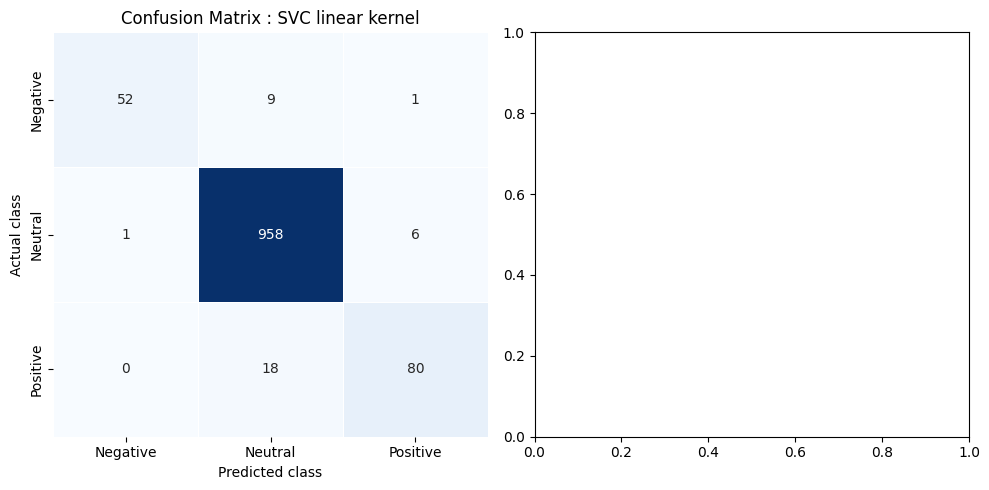

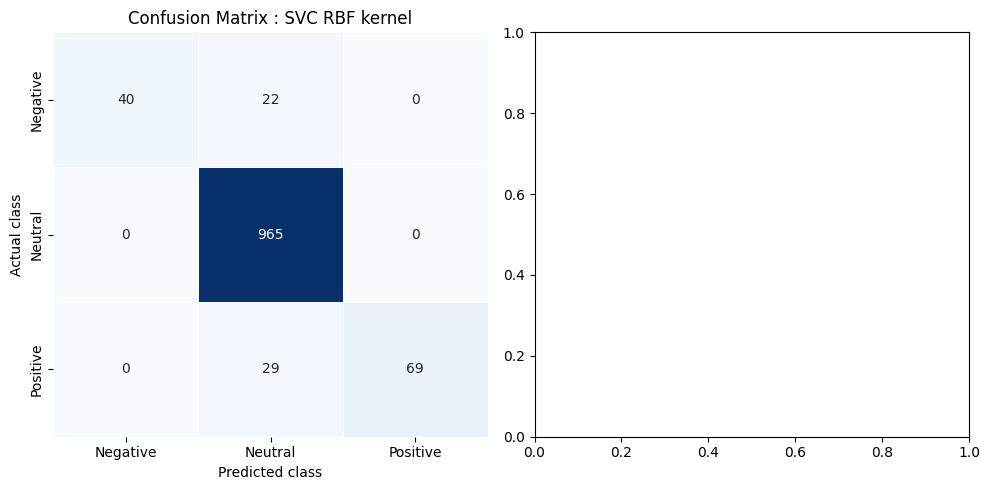

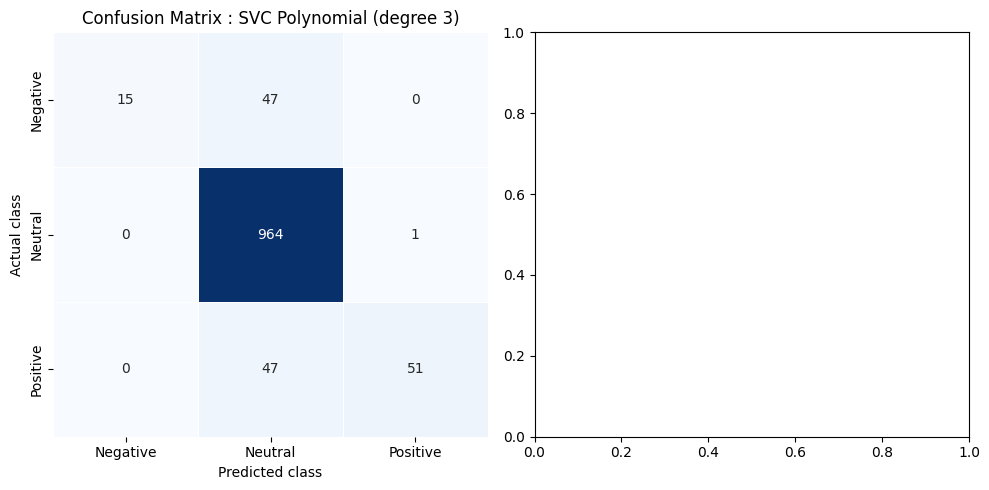

In [102]:
print("[INFO] Laporan klasifikasi\n")
target_names=['Negative', 'Neutral','Positive']
for name, clf in models:
  clf_predict = clf.predict(X_test) #y_pred
  printed_titles=('Menggunakan Metode :{} \n'.format(name))
  printed=(classification_report(y_test, clf_predict, target_names=['Negative', 'Neutral','Positive']))
  akurasi=('Accuracy score: %.2f%%' %(accuracy_score(y_test, clf_predict)*100))  
  presisi=('Precision score: %.2f%%' % (precision_score(y_test, clf_predict, average= 'weighted')*100))
  recall=('Recall score: %.2f%% \n' % (recall_score(y_test, clf_predict, average= 'weighted')*100))
  
  with open('hasil/classification_report_pilpres2024_'+str(jsampling)+'_'+str(dtuji)+'_'+str(d)+'.txt', 'a', encoding='utf-8') as f:
      # f.writelines(''.join(name))
      f.writelines(''.join(printed_titles))
      f.writelines(''.join(printed))
      f.writelines(' \n')
      f.writelines(''.join(akurasi+'\n'+presisi+'\n'+recall))

      f.writelines(' \n')
  print(printed_titles+'\n'+printed)
  print(akurasi+'\n'+presisi+'\n'+recall)
  # Confusion Matrix Plot
  fig, [ax1, ax2] = plt.subplots(1, 2, figsize=(10, 5))
  cm = confusion_matrix(y_test, clf_predict, labels=['Negative', 'Neutral','Positive'])
  sns.heatmap(cm, annot = True, cbar = False, fmt = "d", linewidths = .5, cmap = "Blues", ax = ax1)
  ax1.set_title("Confusion Matrix : {}".format(name))
  ax1.set_xlabel("Predicted class")
  ax1.set_ylabel("Actual class")
  ax1.set_xticklabels(target_names)
  ax1.set_yticklabels(target_names)
  fig.tight_layout()
  plt.savefig('hasil/5.confusion_matrix_'+str(jsampling)+'_{}.png'.format(name))


## Parameter Optimization RandomizedSearchCV / GridSearchCV

In [103]:
cv = StratifiedKFold(n_splits= 3, shuffle = True, random_state= 123)
# Randomized grid search
n_iter_search = 10
param_grid = {'gamma': np.logspace(-2, 2, 5),
              'C': np.logspace(-2, 2, 5)}
gs = RandomizedSearchCV(clf, param_distributions = param_grid, n_iter = n_iter_search, cv = cv, scoring= 'accuracy')
# gs = GridSearchCV(clf, param_grid=param_grid,refit = True, verbose = 3,scoring='accuracy',n_jobs=-1)
# -----------------------------------------------------
# Train model
gs.fit(X_train, y_train)  
best=("The best parameters are %s" % (gs.best_params_)) 
# Predict on test set
y_pred = gs.best_estimator_.predict(X_test)

#Setup GridSearchCV
# grid = GridSearchCV(pipe, param_grid=param_grid,refit = True, verbose = 3,scoring='accuracy',n_jobs=-1)
# grid.fit(X_train, y_train)
# y_pred = grid.predict(X_test)

# Get Probability estimates
# y_prob = gs.best_estimator_.predict_proba(X_test)[:, 1]
# -----------------------------------------------------
akurasi=('Accuracy score: %.2f%%' %(accuracy_score(y_test, y_pred)*100))  
presisi=('Precision score: %.2f%%' % (precision_score(y_test, y_pred, average= 'weighted')*100))
recall=('Recall score: %.2f%%' % (recall_score(y_test, y_pred, average= 'weighted')*100))
with open('hasil/parameter_optimization_report_pilpres2024_'+str(jsampling)+'_'+str(dtuji)+'_'+str(d)+'.txt', 'a', encoding='utf-8') as f:
    # f.writelines(''.join(name))
    f.writelines(''.join('Parameter Optimization'))
    f.writelines(''.join(best))
    f.writelines(' \n')
    f.writelines(''.join(y_pred))
    f.writelines(' \n')
    f.writelines(''.join(akurasi+'\n'+presisi+'\n'+recall))
    f.writelines(' \n')

print(best+'\n'+y_pred+'\n'+akurasi+'\n'+presisi+'\n'+recall)

["The best parameters are {'gamma': 1.0, 'C': 10.0}\nNegative\nAccuracy score: 95.91%\nPrecision score: 95.94%\nRecall score: 95.91%"
 "The best parameters are {'gamma': 1.0, 'C': 10.0}\nNeutral\nAccuracy score: 95.91%\nPrecision score: 95.94%\nRecall score: 95.91%"
 "The best parameters are {'gamma': 1.0, 'C': 10.0}\nNeutral\nAccuracy score: 95.91%\nPrecision score: 95.94%\nRecall score: 95.91%"
 ...
 "The best parameters are {'gamma': 1.0, 'C': 10.0}\nNeutral\nAccuracy score: 95.91%\nPrecision score: 95.94%\nRecall score: 95.91%"
 "The best parameters are {'gamma': 1.0, 'C': 10.0}\nNeutral\nAccuracy score: 95.91%\nPrecision score: 95.94%\nRecall score: 95.91%"
 "The best parameters are {'gamma': 1.0, 'C': 10.0}\nNeutral\nAccuracy score: 95.91%\nPrecision score: 95.94%\nRecall score: 95.91%"]


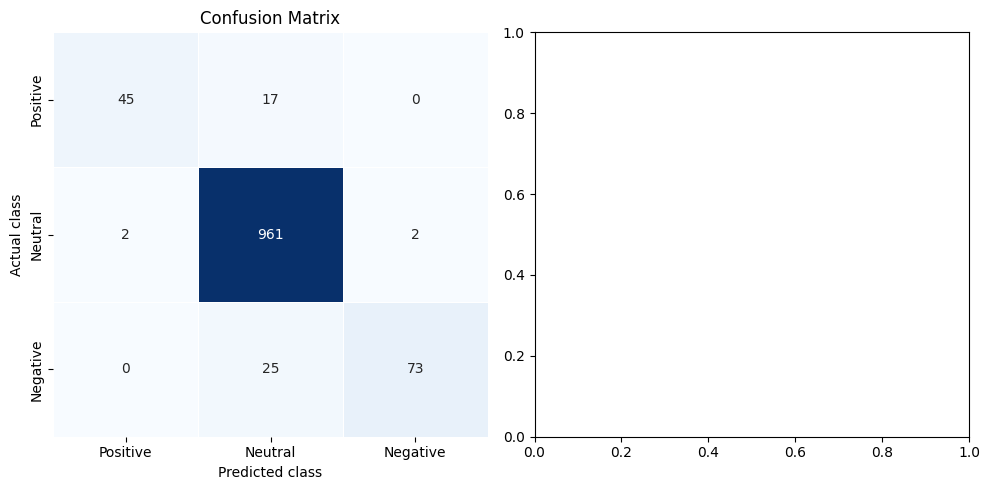

In [104]:
target_label=['Positive','Neutral','Negative']
# Plot confusion matrix
fig, [ax1, ax2] = plt.subplots(1, 2, figsize=(10, 5))
cm = confusion_matrix(y_test, y_pred)#, labels= target_label)
sns.heatmap(cm, annot = True, cbar = False, fmt = "d", linewidths = .5, cmap = "Blues", ax = ax1)
ax1.set_title("Confusion Matrix")
ax1.set_xlabel("Predicted class")
ax1.set_ylabel("Actual class")
ax1.set_xticklabels(target_label)
ax1.set_yticklabels(target_label)
fig.tight_layout()
plt.savefig('hasil/5.confusion_matrix_optimization_parameter'+str(jsampling)+'_.png')


## AUROC dan AUC